In [6]:
#tally file parser for dealing with the tally files that come out of the venturelli lab workflow

#step 1. generate the interested wells

num = ["04", "06", "08", "10"]
letter = ["B", "D", "F", "H"]
wells = []
for n in num:
    for l in letter:
        wells.append(l+n)

wells.append("D02")
wells.append("F02")

wells = ["P23" + w for w in wells]
wells


['P23B04',
 'P23D04',
 'P23F04',
 'P23H04',
 'P23B06',
 'P23D06',
 'P23F06',
 'P23H06',
 'P23B08',
 'P23D08',
 'P23F08',
 'P23H08',
 'P23B10',
 'P23D10',
 'P23F10',
 'P23H10',
 'P23D02',
 'P23F02']

In [77]:
#step 2  load the tally file as pandas 
import pandas as pd

df = pd.read_csv("miseq59-tally.csv")

#get only the wells of interest
df = df[df["Sample"].isin(wells)]

#label wells by condition
treatments = {'P23B04':'Psg1Tet1', 
 'P23D04':'Psg1Tet2',
 'P23F04':'Psg1Erm1',
 'P23H04':'Psg1Erm2',
 'P23B06':'Psg2Tet1',
 'P23D06':'Psg2Tet2',
 'P23F06':'Psg2Erm1',
 'P23H06':'Psg2Erm2',
 'P23B08':'Psg3Tet1',
 'P23D08':'Psg3Tet2',
 'P23F08':'Psg3Erm1',
 'P23H08':'Psg3Erm2',
 'P23B10':'Psg4Tet1',
 'P23D10':'Psg4Tet2',
 'P23F10':'Psg4Erm1',
 'P23H10':'Psg4Erm2',
 'P23D02':'ControlComm6',
 'P23F02':'ControlMock'}

#make new column, and derive the values from "Sample"
treatcol = list(df["Sample"].apply(lambda x: treatments[x]))

#delete unnamed columns
#df = df.drop("Unnamed: 0")
df.index = df["Sample"]
df = df.drop(columns = ["Unnamed: 0", "Sample"])
df

#remove the background noise reads (< 100 reads)
df = df.applymap(lambda x: 0 if int(x) <= 100 else int(x))

#add the treatment column
df["treatment"] = treatcol

#I think I will drop the sample column and just index with treatment column
df.index = df["treatment"]
df = df.drop(columns = "treatment")

#remove columns where they are all 0s
df = df.loc[:, (df != 0).any(axis=0)]

#sort the df
df = df.sort_index()
df

,Eubacterium_rectale_ATCC_33656_NC_012781,Unclassified,Total,Bacteroides_uniformis_ATCC_8492,Bacteroides_thetaiotaomicron_VPI-5482_NC_004663,Dorea_longicatena_DSM_13814,Bifidobacterium_adolescentis_ATCC_15703_NC_008618,Clostridium_hiranonis_DSM_13275,Desulfovibrio_piger_ATCC_29098,Parabacteroides_johnsonii_DSM_18315_NZ_ABYH01000014,...,Eggerthella_lenta_DSM_2243_NC_013204,Bacteroides_caccae_ATCC_43185,Bacteroides_vulgatus_ATCC_8482_NC_009614,Collinsella_aerofaciens_ATCC_25986,Blautia_hydrogenotrophica_DSM_10507,Prevotella_copri_DSM_18205,Bacteroides_fragilis_NCTC_9343,Roseburia_intestinalis_L1_82,Bifidobacterium_longum_subsp_infantis,Dorea_formicigenerans_ATCC_27755
treatment,,,,,,,,,,,,,,,,,,,,,
ControlComm6,1990,766,59096,3036,3110,3999,3394,1325,2430,2073,...,1067,3424,1088,1613,1254,4147,2297,2911,1553,1909
ControlMock,8622,515,67780,6410,3835,0,0,3635,10901,0,...,1103,0,2447,3669,7348,9272,0,0,0,0
Psg1Erm1,0,0,46791,0,0,3182,0,0,0,141,...,0,0,0,0,0,1846,0,0,0,1633
Psg1Erm2,0,0,45593,0,2450,0,0,18895,0,371,...,0,0,0,0,0,0,265,0,0,0
Psg1Tet1,0,186,59348,0,0,15076,0,0,0,389,...,0,0,0,0,0,567,0,0,109,4062
Psg2Erm1,0,107,59567,0,0,5781,0,0,0,982,...,0,0,0,0,0,1881,0,0,0,742
Psg2Erm2,0,113,55618,0,1694,0,0,27882,0,299,...,0,0,0,0,0,0,327,0,0,0
Psg2Tet2,0,235,26343,0,2731,0,0,294,0,314,...,0,174,0,0,0,0,7356,0,0,0
Psg3Erm1,0,0,56652,0,0,116,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

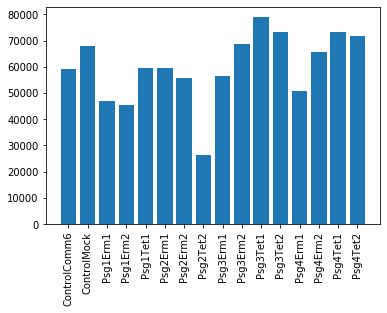

In [74]:
#step 3 start plotting metrics
import matplotlib.pyplot as plt

#total reads
plt.bar(df.index, height = df["Total"])
plt.xticks(rotation = 90)

In [82]:
#normalize by total to get compositional data
dfcomp = df.div(df["Total"], axis = 0)
dfcomp = dfcomp.drop(columns = "Total")
dfcomp = dfcomp.drop(columns = "Unclassified")
dfcomp



,Eubacterium_rectale_ATCC_33656_NC_012781,Bacteroides_uniformis_ATCC_8492,Bacteroides_thetaiotaomicron_VPI-5482_NC_004663,Dorea_longicatena_DSM_13814,Bifidobacterium_adolescentis_ATCC_15703_NC_008618,Clostridium_hiranonis_DSM_13275,Desulfovibrio_piger_ATCC_29098,Parabacteroides_johnsonii_DSM_18315_NZ_ABYH01000014,Faecalibacterium_prausnitzii_A2_165_NZ,Coprococcus_comes_1.0.1_Cont2276_NZ_ABVR01000038,...,Eggerthella_lenta_DSM_2243_NC_013204,Bacteroides_caccae_ATCC_43185,Bacteroides_vulgatus_ATCC_8482_NC_009614,Collinsella_aerofaciens_ATCC_25986,Blautia_hydrogenotrophica_DSM_10507,Prevotella_copri_DSM_18205,Bacteroides_fragilis_NCTC_9343,Roseburia_intestinalis_L1_82,Bifidobacterium_longum_subsp_infantis,Dorea_formicigenerans_ATCC_27755
treatment,,,,,,,,,,,,,,,,,,,,,
ControlComm6,0.033674,0.051374,0.052626,0.067670,0.057432,0.022421,0.041120,0.035079,0.046450,0.049834,...,0.018055,0.057940,0.018411,0.027295,0.02122,0.070174,0.038869,0.049259,0.026279,0.032303
ControlMock,0.127206,0.094571,0.056580,0.000000,0.000000,0.053629,0.160829,0.000000,0.100398,0.000000,...,0.016273,0.000000,0.036102,0.054131,0.10841,0.136796,0.000000,0.000000,0.000000,0.000000
Psg1Erm1,0.000000,0.000000,0.000000,0.068005,0.000000,0.000000,0.000000,0.003013,0.000000,0.067086,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.039452,0.000000,0.000000,0.000000,0.034900
Psg1Erm2,0.000000,0.000000,0.053736,0.000000,0.000000,0.414428,0.000000,0.008137,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.005812,0.000000,0.000000,0.000000
Psg1Tet1,0.000000,0.000000,0.000000,0.254027,0.000000,0.000000,0.000000,0.006555,0.000000,0.117258,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.009554,0.000000,0.000000,0.001837,0.068444
Psg2Erm1,0.000000,0.000000,0.000000,0.097050,0.000000,0.000000,0.000000,0.016486,0.000000,0.109859,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.031578,0.000000,0.000000,0.000000,0.012457
Psg2Erm2,0.000000,0.000000,0.030458,0.000000,0.000000,0.501313,0.000000,0.005376,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.005879,0.000000,0.000000,0.000000
Psg2Tet2,0.000000,0.000000,0.103671,0.000000,0.000000,0.011160,0.000000,0.011920,0.000000,0.000000,...,0.000000,0.006605,0.000000,0.000000,0.00000,0.000000,0.279239,0.000000,0.000000,0.000000
Psg3Erm1,0.000000,0.000000,0.000000,0.002048,0.000000,0.000000,0.000000,0.000000,0.000000,0.002153,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
